In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

import sweetviz as sv

/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_79964/1709647895.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/james/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
############### CUSTOM MADE FUNCTIONS   ##########

###### CREATE A SUMMARIZE FUNCTION DOING ".DESCRIBE()" & ".INFO" SIMULTANEOUSLY

def profile_data(data):
    return pd.concat(
        [
            pd.Series(data.dtypes , name = "Dtype") ,
            # counts
            pd.Series( data.count()        , name = "Count") ,
            pd.Series( data.isnull().sum() , name = "NA Count") ,
            pd.Series( data.nunique()      , name = "Count Unique") ,
            pd.Series( data.duplicated().sum()   , name = "Count Duplicate"),
            # Stats
            pd.Series( data.min( skipna = True)   , name = "Min" ) ,
            pd.Series( data.max( skipna = True ) , name = "Max" ) ,
            pd.Series( data.mean()          , name = "Mean") ,
            pd.Series( data.median()        , name = "Median") ,
            pd.Series( data.mode().iloc[0]  , name = "Mode") ,
        ] ,
        axis = 1
    )

In [3]:
### PREPARE CATEGORICAL VS TARGET ###

def prepare_table_cat_and_target(
    data ,
    category_col ,
    target_col ,
    sort_order = False
):
    data_category_df = data \
        .value_counts(category_col, normalize= True) \
        .mul(100 ) \
        .round(2) \
        .rename('Percentage_dataset') \
        .to_frame()

    data_target_df = data[[category_col,target_col]] \
        .groupby(category_col) \
        .mean() \
        .mul(100) \
        .round(2) \
        .sort_values( by = target_col , ascending= sort_order )

    data_catarget_df = data_category_df \
        .merge(
            data_target_df ,
            how = "left" ,
            left_index = True ,
            right_index = True ,
        ) \
        .sort_values( by = category_col , ascending = sort_order) \
        .reset_index()

    return data_catarget_df

In [4]:
### PLOT CATEGORICAL VS TARGET ###

def plot_cat_and_target(
    data ,
    category_col ,
    target_col ,
    figure_size = (10, 10) ,
    **kwargs
):

    data[category_col] = data[category_col].astype("category")
    #data = test_df.copy()
    #sort_order = False

    #data["Pclass"] = data["Pclass"].astype("category")
    #category_col = "Pclass"
    #target_col   = "Survived"
    #figure_size = (10, 10)

    plt.figure(figsize= figure_size)
    # Plot bar chart for "percent" variable
    sns.barplot(data= data, y= category_col, x='Percentage_dataset', orient= "h" , **kwargs)

    # Overlay line plot for "target" variable
    ax2 = plt.gca().twiny()
    sns.pointplot(
        data= data ,
        y = category_col,
        x = target_col,
        color='red',
        linestyles= "-" ,
        markers= "o" ,
        ax=ax2 ,
        join= True ,
    )

    # Set labels and title, axes ...
    plt.xlabel('Percent', color='blue')
    ax2.set_xlabel(target_col, color='red')
    ax2.tick_params(axis='x', colors='red')

    plt.gca().xaxis.set_major_formatter(PercentFormatter(100))
    plt.ylabel(category_col)
    plt.title(f'{category_col} vs {target_col} in proportion')


In [5]:

#######     PROJECT START       #######


titanic_df = pd.read_csv("train.csv")

In [6]:
# PassengerID :

# Survivded : 0 = NO , 1 = YES

# PCLAS : passenger class : 1st / 2nd / 3rd

# SEX : Male or Female

# AGE : in years

# sibsp : nb of siblings / spouses aboard

# parch : nb of parents / children aboard

# TICKET : ticket number

# FARE : passenger fare in USD

# CABIN : Cabin number

# EMBARKED :  Port of Embarkation : C Cherbourg Q Queenstown  S Southhampton

# PassengerID and Cabin# probably wont be relevant if we cannot link the latter to a cabin location map and place of damage

In [7]:
profile_data(titanic_df)

# titanic_df.Age.isna().value_counts( normalize= True ).round( decimals=2)
# titanic_df.Cabin.isna().value_counts( normalize= True ).round( decimals=3)

##  Cabin       is  missing for about 77% of data
##  Age         is  missing _________ 20% of data
##  Embarked    is  missing _________0.2% of data


# Before the report, some data probably may not be useful :
# PassengerID : index, repeating with real titanic_df.index
# Cabin (too many missing)
# Passenger Name (likely high cardinality) ??

TypeError: '<=' not supported between instances of 'float' and 'str'

In [ ]:
report = sv.analyze(
    titanic_df ,
    target_feat = "Survived"
)

report.show_html(
    filepath = "titanic_df_report.html"
)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report titanic_df_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/85390132.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/85390132.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Died', 'Survived'])


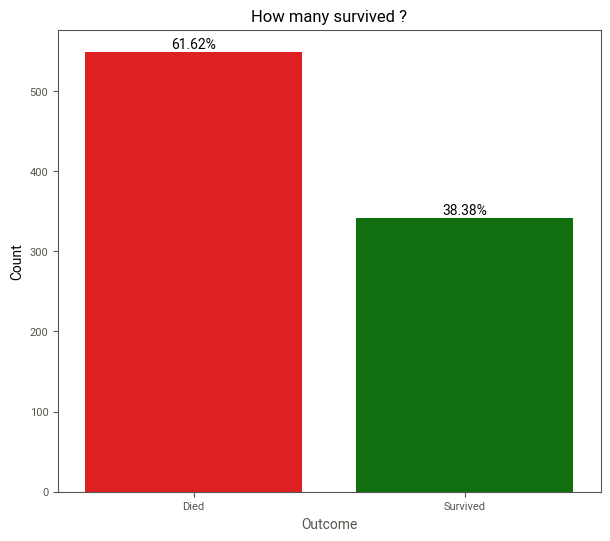

In [ ]:
#############################################
####                                     ####
####    EXPLORATORY DATA ANALYSIS        ####
####                                     ####
#############################################


####    TARGET PROPORTION   ####
#### ---------------------  ####

# Calculate and plot the proportion of passengers who survived and who did not survive
survival_counts = (titanic_df['Survived'].value_counts(normalize=True) * 100 ).round(decimals=2)
survival_counts_abs = titanic_df['Survived'].value_counts()

survival_counts_df = pd.DataFrame({
    'Survived'  : survival_counts.index,
    'Percentage': survival_counts.values ,
    'Count'     : survival_counts_abs.values ,
                                    })


plt.figure(figsize=(7 ,6))
ax = sns.barplot(
    data = survival_counts_df,
    y    ='Count' , x='Survived',
    orient='vertical', palette = ["red", "green"]
)


plt.ylabel('Count', color='black')
plt.xlabel('Outcome')
ax.set_xticklabels(['Died', 'Survived'])
plt.title('How many survived ?')

for i, row in survival_counts_df.iterrows():
    percentage = row["Percentage"]
    plt.text( i , row["Count"] , f'{percentage:.2f}%', ha='center', va='bottom' , color = "black")

# plt.savefig('c:\\DevAcademy\\Projects\\06_Classification\\pictures\\survival_chance.jpg', dpi = 150)


# print(list( enumerate(survival_counts_df) ))
# print(list(survival_counts_df.iterrows()))



# sns.catplot(
#     data=titanic_df, x="Pclass", y="Survived", hue="Sex",
#     palette={"male": "g", "female": "m"},
#     markers=["^", "o"], linestyles=["-", "--"],
#     kind="point"
# )

In [ ]:
survival_counts_df

,Survived,Percentage,Count
0,0,61.62,549
1,1,38.38,342


/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/3007208294.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic_df, y='Sex' , orient = "h" ,
/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/3007208294.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percentages[i]


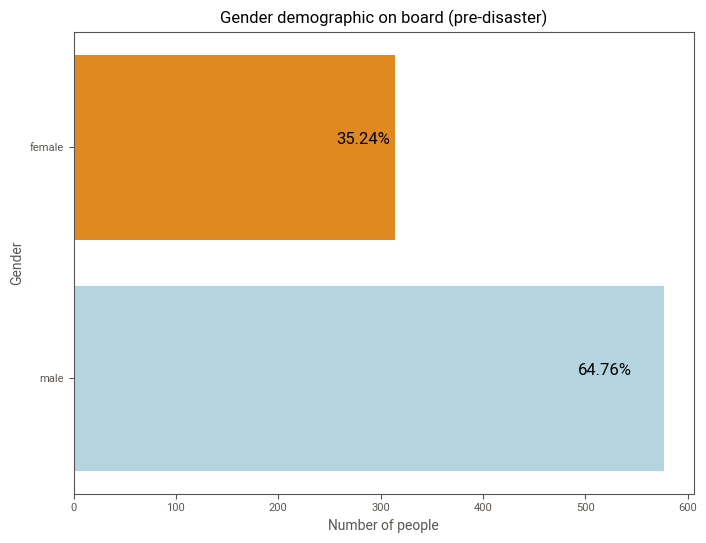

In [ ]:
####    GENDER PROPORTION   ####
#### ---------------------  ####

# Count and assess proportion of survivors per gender
counts = titanic_df["Sex"].value_counts().sort_index()
percentages = counts / counts.sum() * 100


plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, y='Sex' , orient = "h" ,
             order = ["female","male"] , palette= ["darkorange","lightblue"]
)

plt.title('Gender demographic on board (pre-disaster)')
plt.xlabel('Number of people')
plt.ylabel('Gender')

# Insert percentage labels
total = len(titanic_df)
for i, count in enumerate(counts):
    percentage = percentages[i]
    plt.text(count - 0.1*count, i, f'{percentage:.2f}%', ha='center', va='bottom' , fontsize = 12 , color = "black")

# Save plot
# plt.savefig('c:\\DevAcademy\\Projects\\06_Classification\\pictures\\gender_demographic.jpg', dpi = 150)

Text(0, 0.5, 'Number')

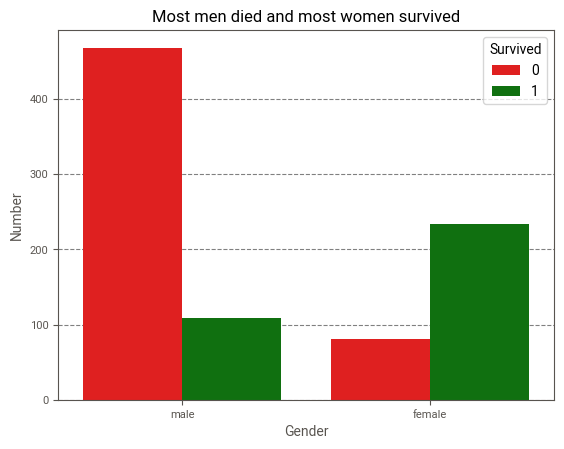

In [ ]:
## Gender proportion upon disaster (survivors and loss)

ax = sns.countplot(data=titanic_df, x='Sex' , hue = "Survived", palette = ["red","green"])
ax.set_axisbelow(True)
ax.grid(color = "gray", linestyle = "dashed" , axis = "y")
plt.title('Most men died and most women survived')
plt.xlabel('Gender')
plt.ylabel('Number')

/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/1895310708.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data, y= category_col, x='Percentage_dataset', orient= "h" , **kwargs)
/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/1895310708.py:26: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(


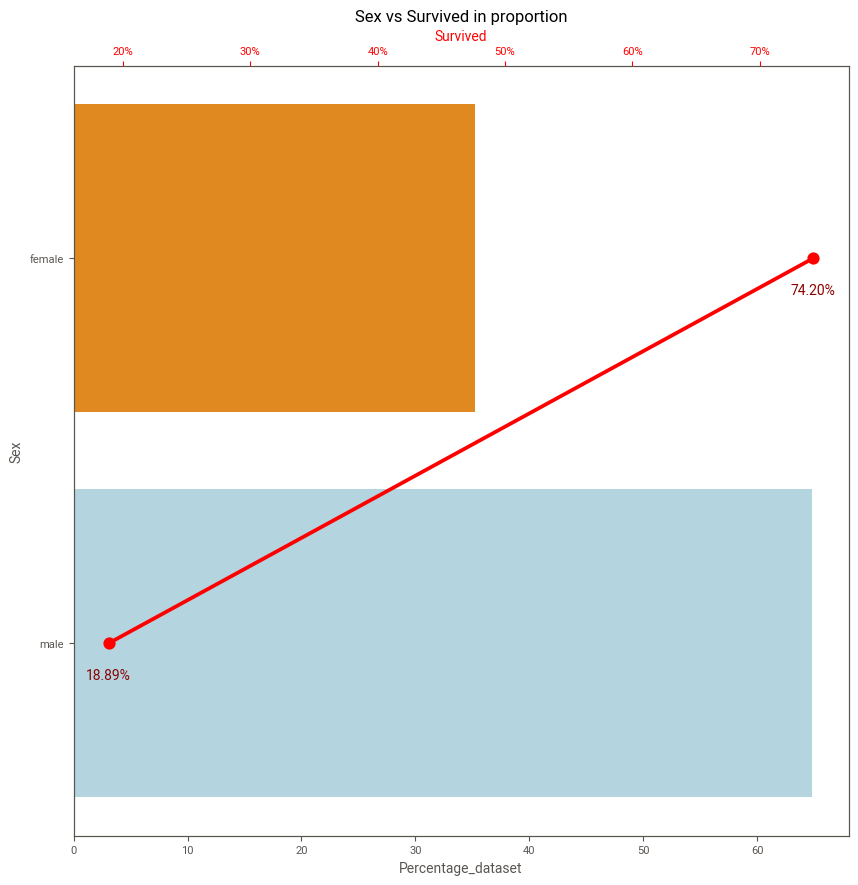

In [ ]:
####  GENDER vs TARGET   ####

titanic_sex_survived_df = prepare_table_cat_and_target(
    data  = titanic_df ,
    category_col =  "Sex" ,
    target_col   =  "Survived" ,
    sort_order = True
)

## Original category distribution pre-disaster AND proportion of category among survivors after disaster
plot_cat_and_target(
    data  = titanic_sex_survived_df ,
    category_col = "Sex"      ,
    target_col   = "Survived" ,
    figure_size = (10, 10) ,
    palette = ["darkorange","lightblue"]
)
for i, row in titanic_sex_survived_df.iterrows():
    percentage = row["Survived"]
    plt.text(percentage , i + 0.1, f'{percentage:.2f}%', ha='center', va='bottom' , color = "darkred")

# How to read : Among all survivors, women make up 74% whilst men make about 19%

# Save figure
# plt.savefig('c:\\DevAcademy\\Projects\\06_Classification\\pictures\\gender_demographic_survived.jpg', dpi = 150)


# print( list (titanic_sex_survived_df.iterrows()))
# print(list( enumerate(counts)  ))
# print(list( enumerate(test_df)  ))

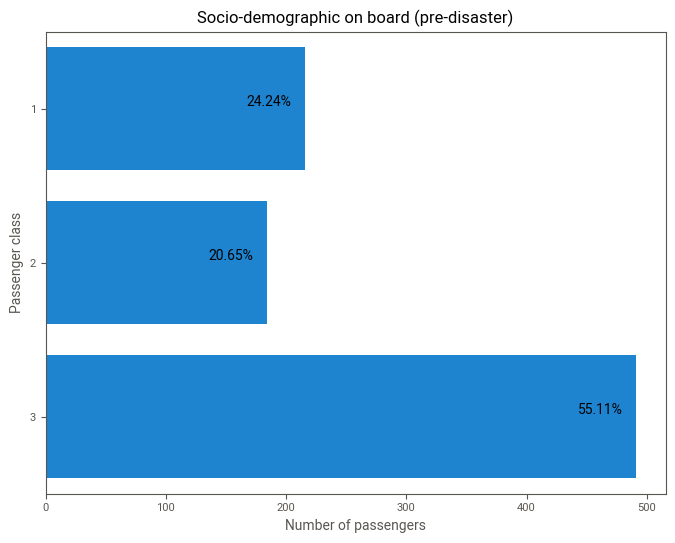

In [ ]:
####    CLASS vs SURVIVED       ####
####   -----------------------  ####


counts = titanic_df["Pclass"].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Plot the distribution using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df.sort_values("Pclass" , ascending = False), y='Pclass' , orient = "h" ,
             order = [1, 2 , 3]
)

plt.title('Socio-demographic on board (pre-disaster)')
plt.xlabel('Number of passengers')
plt.ylabel('Passenger class')

# Annotate bars with percentages
total = len(titanic_df)
for i, count in enumerate(counts):
    percentage = percentages[i+1]
    plt.text(count - 30 , i, f'{percentage:.2f}%', ha='center', va='bottom')

In [ ]:
counts

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/1895310708.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data, y= category_col, x='Percentage_dataset', orient= "h" , **kwargs)
/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/1895310708.py:26: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(


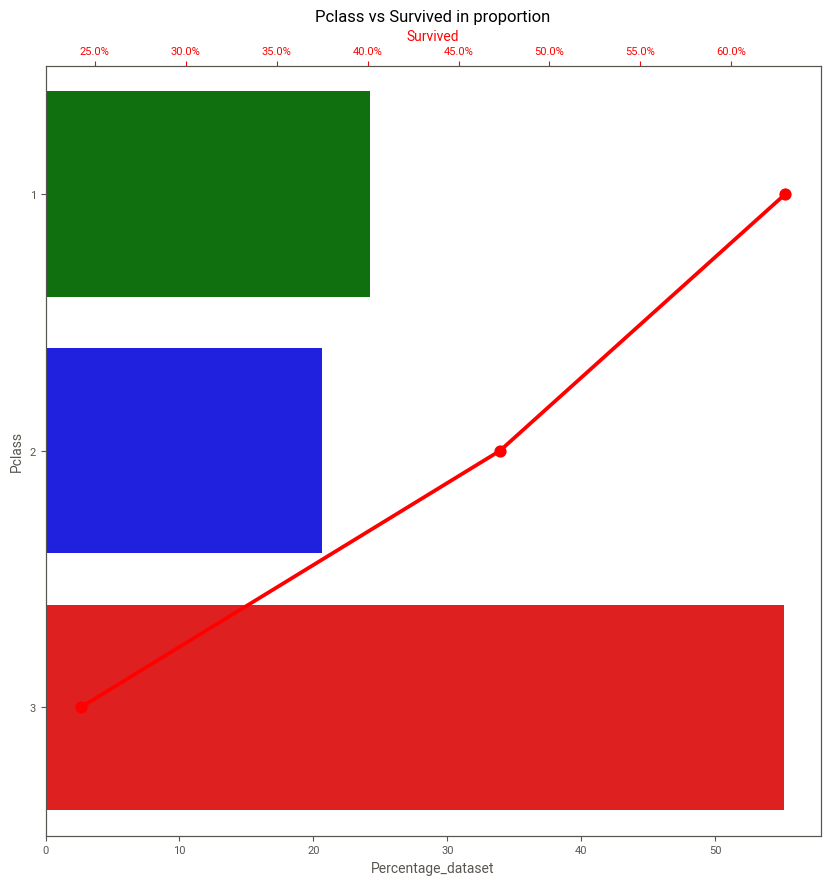

In [ ]:
####  CLASS vs TARGET   ####

test_df = prepare_table_cat_and_target(
    data         = titanic_df ,
    category_col = "Pclass" ,
    target_col   = "Survived" ,
    sort_order   = False
)
# change otherwise plot will not
# test_df["Pclass"] = pd.Series( test_df["Pclass"]  , dtype = "category")

plot_cat_and_target(
    data         = test_df ,
    category_col = "Pclass" ,
    target_col   = "Survived" ,
    palette = ["green","blue","red"]
)


<Axes: xlabel='Pclass', ylabel='prop_category'>

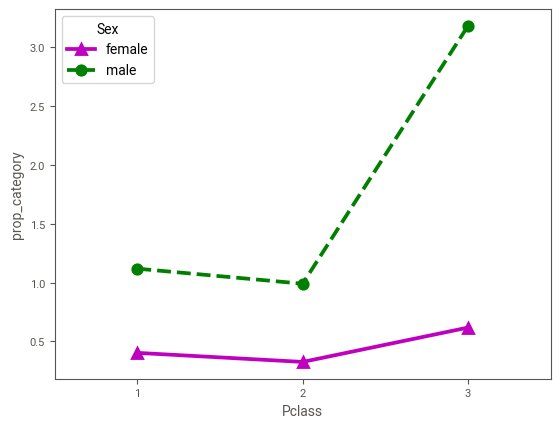

In [ ]:
#    CLASS vs GENDER vs SURVIVED
# ----------------------------

proportion_sex_survived_df = titanic_df[["Sex","Survived"]] \
    .groupby("Sex") \
    .sum()


sex_class_target_df = titanic_df[["Sex","Pclass","Survived"]] \
    .groupby(["Sex","Pclass"]) \
    .count() \
    .merge(
        right = proportion_sex_survived_df ,
        how = "left" ,
        left_index = True,
        right_index = True
    ) \
    .assign(
        prop_category  = lambda x:(x["Survived_x"]/x["Survived_y"]).round(decimals = 3) ,
        prop_all_surv  = lambda x:(x["Survived_x"]/ x["Survived_x"].sum() ).round(decimals = 3) ,
    ) \
    .rename(
        columns= {
            "Survived_x" : "survived_category" ,
            "Survived_y" : "survived_sex"
        }
    ).reset_index()

# ## Plot
sns.pointplot(
    data=sex_class_target_df, x="Pclass", y="prop_category", hue="Sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
)

Text(0, 0.5, 'Proportion of survivors in the category Class|Gender')

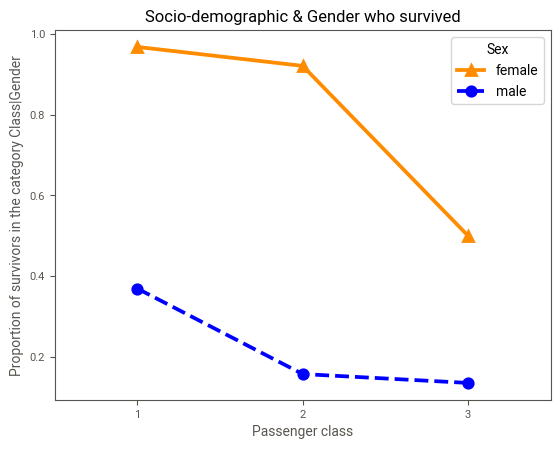

In [ ]:
###  SURVIVORS AND PROPORTION IN CATEGORY    ###
### -------------------------------------    ###

proportion_sex_class_df = titanic_df[["Sex","Pclass","Survived"]] \
    .groupby(["Sex","Pclass"]) \
    .count()

sex_class_prop_df = titanic_df[["Sex","Pclass","Survived"]] \
    .groupby(["Sex","Pclass"]) \
    .sum() \
    .merge(
        right = proportion_sex_class_df ,
        how = "left" ,
        left_index = True,
        right_index = True
    ) \
    .assign(
        prop_surv_category  = lambda x:(x["Survived_x"]/x["Survived_y"]).round(decimals = 3) ,
    ) \
    .rename(
        columns= {
            "Survived_x" : "survived_category" ,
            "Survived_y" : "total_category"
        }
    ).reset_index()

    ## Plot based on both categories
## For a given combined category (Class and Gender, aka Female 1st Class),
#      whats the proportion of survivors in this category ?
# ex : 91 females out 94 survived in the first class (female) category

sns.pointplot(
    data    = sex_class_prop_df, x="Pclass", y="prop_surv_category", hue="Sex",
    palette ={"male": "blue", "female": "darkorange"},
    markers =["^", "o"], linestyles=["-", "--"]
)
plt.title('Socio-demographic & Gender who survived')
plt.xlabel('Passenger class')
plt.ylabel('Proportion of survivors in the category Class|Gender')


In [ ]:
proportion_sex_class_df

Survived
Sex    Pclass          
female 1             94
       2             76
       3            144
male   1            122
       2            108
       3            347

In [ ]:
sex_class_prop_df

,Sex,Pclass,survived_category,total_category,prop_surv_category
0,female,1,91,94,0.968
1,female,2,70,76,0.921
2,female,3,72,144,0.500
3,male,1,45,122,0.369
4,male,2,17,108,0.157
5,male,3,47,347,0.135


Text(0, 0.5, 'Percentage of the dataset')

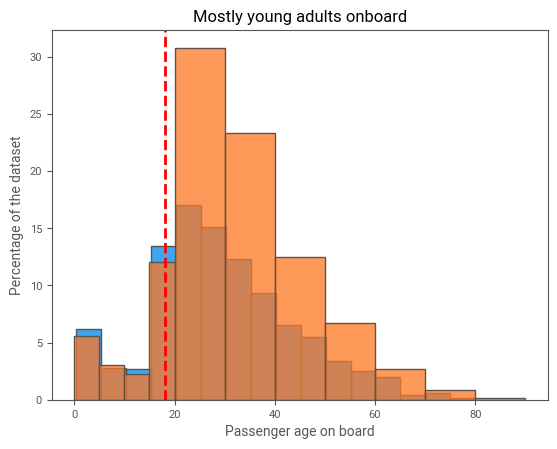

In [ ]:
####    AGE vs CLASS    ####
#### -----------------  ####

titanic_df["Age_bins"] = pd.cut( titanic_df["Age"] , bins = np.arange(0,100,10) )

titanic_df["Age_bins_2"] = pd.cut(
    titanic_df["Age"] ,
    bins = [0,5,10,15,20, 30, 40, 50 , 60, 70 , 80 , 90] ,
    right= False ,
    include_lowest= True
)

sns.histplot(
    data  =  titanic_df ,
    x     =  "Age" ,
    stat = "percent" ,
    binwidth  = 5
)


# Different bins to look at different populations : e.g. kids up to 3y old ? Adult age starting from 18y old ?
#newBins = [0,3,10,15,18,20,30,40,50,60,70,80,90]
newBins = [0,5,10,15,20,30,40,50,60,70,80,90]

ax = sns.histplot(titanic_df["Age"].values,bins=newBins,kde=False , stat = "percent"  )
plt.axvline(x=18 , color = "red", lw = 2 , ls = "--" )  # 18y old separation line
plt.title('Mostly young adults onboard')
plt.xlabel('Passenger age on board')
plt.ylabel('Percentage of the dataset')

# Focusing on some parts of the histogram ?
# ax.set_xlim(0, 20)

/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/1154077232.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_kid_class_df = titanic_df[["Age_bins_2","Pclass","Survived"]] \
/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_76885/1154077232.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kid_class_prop_df = titanic_df[["Age_bins_2","Pclass","Survived"]] \


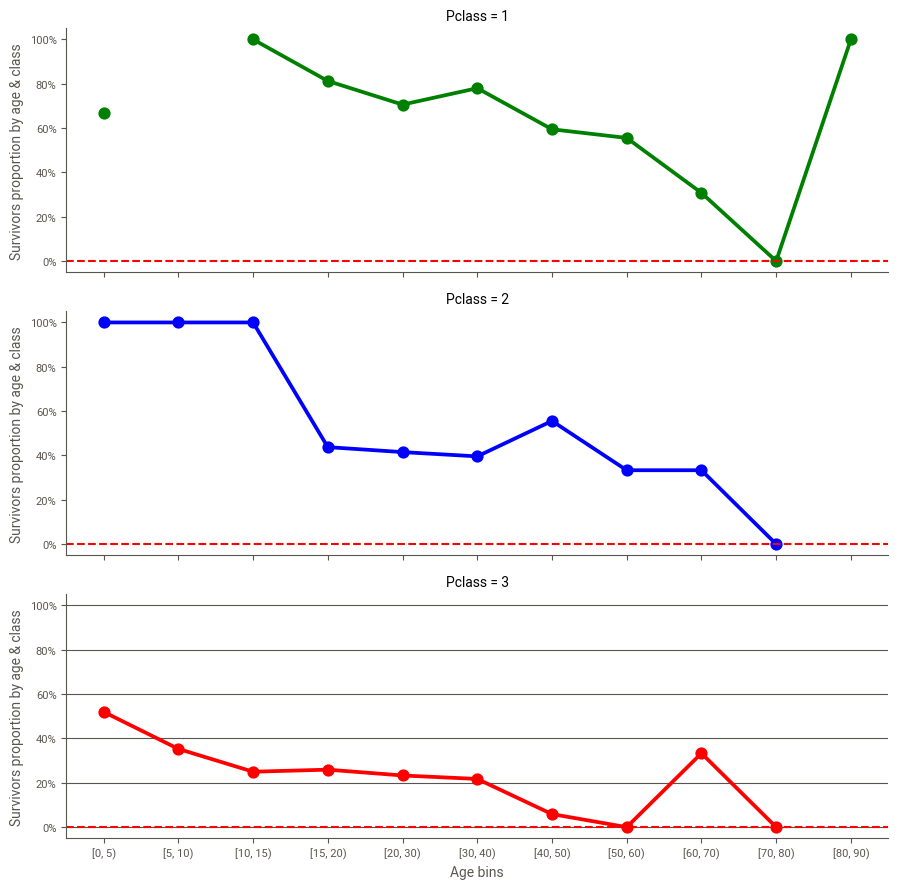

In [ ]:
####    SURVIVORS AND PROPORTION IN CATEGORY    ####
####  ----------------------------------------  ####


proportion_kid_class_df = titanic_df[["Age_bins_2","Pclass","Survived"]] \
    .groupby(["Age_bins_2","Pclass"]) \
    .count()

kid_class_prop_df = titanic_df[["Age_bins_2","Pclass","Survived"]] \
    .groupby(["Age_bins_2","Pclass"]) \
    .sum() \
    .merge(
        right = proportion_kid_class_df ,
        how = "left" ,
        left_index = True,
        right_index = True
    ) \
    .assign(
        prop_surv_category  = lambda x:(x["Survived_x"]/x["Survived_y"] * 100 ).round(decimals = 2) ,
    ) \
    .rename(
        columns= {
            "Survived_x" : "survived_category" ,
            "Survived_y" : "total_category"
        }
    ).reset_index()


sns.set_palette("bright")
my_palette = ["green", "blue" , "red"]
g = sns.FacetGrid(
    kid_class_prop_df,
    row="Pclass" , hue = "Pclass" ,
    height = 3 , aspect = 3 ,
    palette =  my_palette
)
sns.set_style(
    "whitegrid" ,
    { "grid.linestyle" : "--" ,
      "grid.color" : "black"}
)
g.map_dataframe(sns.pointplot, y = "prop_surv_category", x = "Age_bins_2" )
g.map(plt.axhline, y=0, ls='--', c='red')
plt.grid(True , axis = "y")
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
g.set_ylabels("Survivors proportion by age & class")
g.set_xlabels("Age bins")

# How to read the graph ? In 3rd class, for the age range 5-10y old, only 36% of children survived

Text(30.122839506172838, 0.5, 'Passenger class')

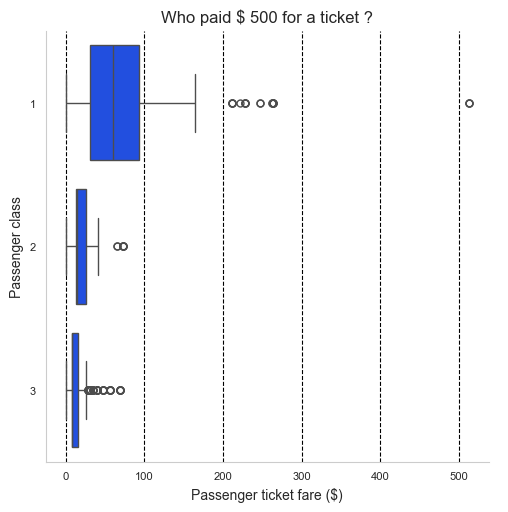

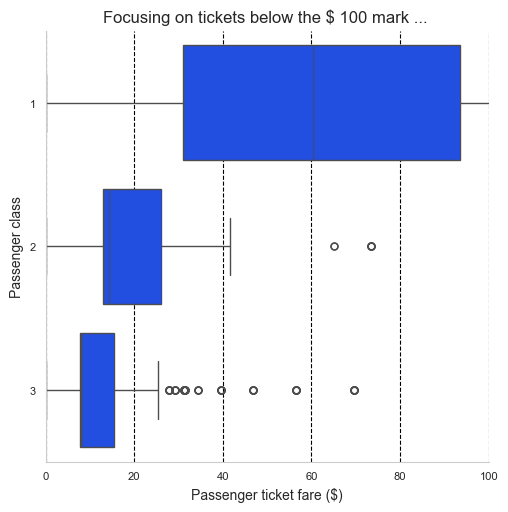

In [ ]:

####    FARE CLASS SURVIVED
#### -------------------------

####    TOP10 OF WHO PAID A LOT ?    #####

#titanic_df.sort_values("Embarked", ascending = True).head(10)

(
titanic_df.
sort_values("Pclass")
#.query("Fare <= 100")
.pipe(
    ( sns.catplot, "data") ,
     x      = "Fare"  , y    = "Pclass" ,
     orient = "h"     , kind = "box"
    )
)
plt.title('Who paid $ 500 for a ticket ?')
plt.xlabel('Passenger ticket fare ($)')
plt.ylabel('Passenger class')


plt.savefig('c:\\ndsha_maps\\learning\\python\\DevAcademy\\Projects\\06_Classification\\pictures\\fare_class.jpg', dpi = 150)


ax = sns.catplot(
     data =  titanic_df.sort_values("Pclass") ,
     x      = "Fare"  , y    = "Pclass" ,
     orient = "h"     , kind = "box"
)
plt.xlim([0, 100])
plt.title('Focusing on tickets below the $ 100 mark ... ')
plt.xlabel('Passenger ticket fare ($)')
plt.ylabel('Passenger class')


(0.0, 300.0)

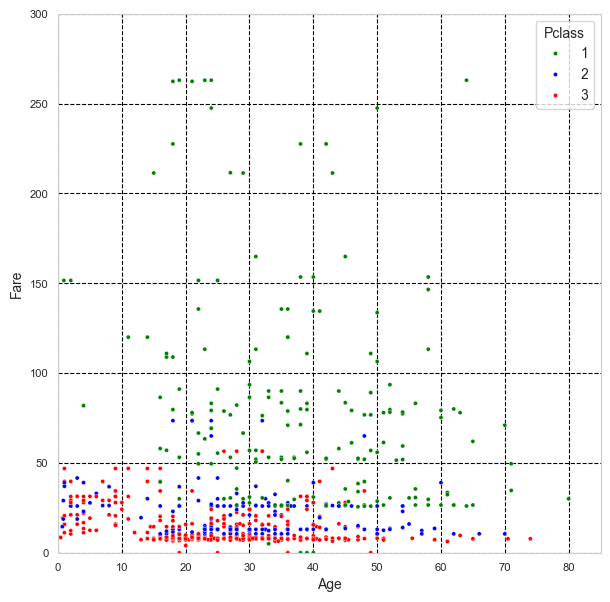

In [ ]:
####    HOW TO FILL UP THE NAs for the AGE  ####

# average or median age by class ?


####    RELATION BETWEEN AGE, FARE and CLASS ?  ####
#### -----------------------------------------  ####

# Question : Based on your class and how much money you paid, could I find out your age ?

plt.figure(figsize= (7,7))
ax = sns.scatterplot(
    data = titanic_df , #.query("Pclass == 3") ,
    x = "Age" ,
    y = "Fare" ,
    hue = "Pclass" ,
    palette = ["green","blue","red"]
)
ax.set_xlim(0, 85)
ax.set_ylim(0, 300)

In [9]:
# Fill NaN values in the "age" column with median age per passenger class

median_age_by_class = titanic_df.groupby("Pclass")["Age"].median()
titanic_df["Age"] = titanic_df.apply(
    lambda row: median_age_by_class[row["Pclass"]] if pd.isnull(row["Age"]) else row["Age"],
    axis=1
)

# Verifying that "Age" values do not have missing values

# profile_data(titanic_df)

# Re-defining the bins to solve the NaN created before the "Age" missing values were fixed
titanic_df["Age_bins"] = pd.cut( titanic_df["Age"] , bins = np.arange(0,100,10) )
titanic_df["Age_bins_2"] = pd.cut(
    titanic_df["Age"] ,
    bins = [0,5,10,15,20, 30, 40, 50 , 60, 70 , 80 , 90] ,
    right= False ,
    include_lowest= True
)


## Alternative : determine Age based on polynomial regression using Fare and Pclass to find Age

# could do : boarding port ? siblings and parents how to exploit it .
# Cabin info to extract from based on official info (but many are missing) , like deck, floor etc... ?
# Using Age (numerical) or using Age bin (categorical) in the model hereafter

In [10]:
#############################################
####                                     ####
####    MACHINE LEARNING ANALYSIS        ####
####                                     ####
#############################################


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, KBinsDiscretizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics,svm


# titanic_df.index     = titanic_df.iloc[:,0]
# titanic_df_to_use    = titanic_df[["Pclass","Sex","Fare"]]
# titanic_df_to_target = titanic_df["Survived"]

In [11]:
##### (1) Basic Version (basic encoding, not much processing)

#####   PRE-PROCESSING OF SELECTED FEATURES     ####

numerical_var = titanic_df[["Fare", "Pclass"]]

### Handle categorical variables
categorical_var     = titanic_df[["Sex"]]
label_encoder       = LabelEncoder()

# Iterate over each categorical column and encode it
for column in categorical_var.columns:
    if categorical_var[column].dtype == 'object':
        categorical_var[column] = label_encoder.fit_transform(categorical_var[column])

categorical_var.values


X = pd.concat( [numerical_var , categorical_var] , axis=1)

Y  = titanic_df["Survived"] # .reshape(-1,1)
Y



X = X.values
y = Y.values


/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_79964/3906966955.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_var[column] = label_encoder.fit_transform(categorical_var[column])


LogReg: 0.783705 (0.038924)
KNeig: 0.772437 (0.038895)
Dec Tree: 0.797770 (0.046090)
Gauss: 0.779519 (0.035474)
SVM: 0.764104 (0.039294)


Text(0, 0.5, 'Accuracy')

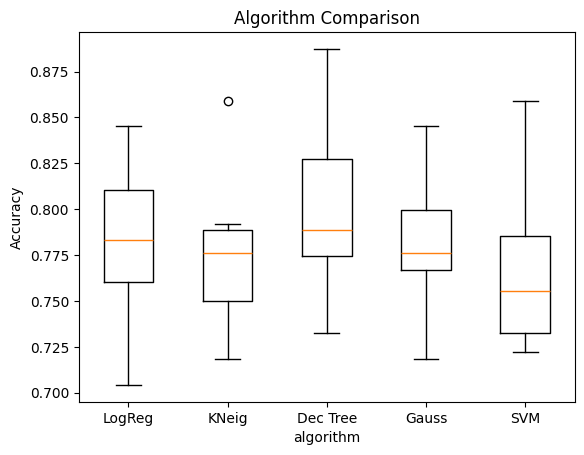

In [12]:
#####   SPLIT-OUT TRAIN/TEST DATASET (non stratified! e.g. likely respecting data imbalance)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


# Prepare ML Algorithms
models = []
models.append(('LogReg', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNeig', KNeighborsClassifier()))
models.append(('Dec Tree', DecisionTreeClassifier()))
models.append(('Gauss', GaussianNB()))
models.append(('SVM', svm.SVC(gamma='auto')))

# evaluate each model in turn, using 10 fold cross validation
results = []
names   = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel("algorithm")
plt.ylabel("Accuracy")

In [13]:
##### (2) Improved Version (label encoding + standard scaling)


#####  ENGINEERING ALL FEATURES ####

numerical_var = titanic_df[["Fare"]]
std_scaler = StandardScaler()

## FIT and TRANSFORM the DATA
scaler_Z = std_scaler.fit_transform(numerical_var)
# scaler_Z[:5]


### Handle categorical variables
categorical_var     = titanic_df[["Sex","Pclass"]]
label_encoder       = LabelEncoder()
# Iterate over each categorical column and encode it
for column in categorical_var.columns:
    if categorical_var[column].dtype == 'object':
        categorical_var[column] = label_encoder.fit_transform(categorical_var[column])

categorical_var.values


# Reshape array1 to match the number of columns in array2
scaler_Z_reshaped = np.reshape(scaler_Z, (891, 1))

# Concatenate arrays along the second axis (columns)
X = np.concatenate((scaler_Z_reshaped, categorical_var.values), axis=1)

Y  = titanic_df["Survived"] # .reshape(-1,1)
Y


#X = X.values
y = Y.values

/var/folders/z3/xgyml3416lx7m5d_s0_7fs9r0000gn/T/ipykernel_79964/3394480084.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_var[column] = label_encoder.fit_transform(categorical_var[column])


LogReg: 0.787911 (0.041076)
KNeig: 0.807570 (0.032208)
Dec Tree: 0.797770 (0.046090)
Gauss: 0.779519 (0.035474)
SVM: 0.782179 (0.036894)


Text(0, 0.5, 'Accuracy')

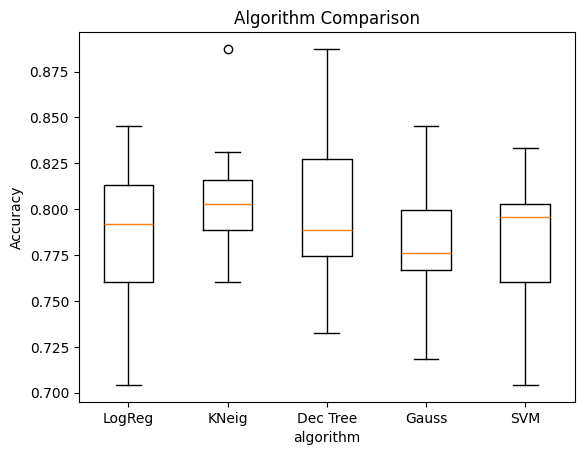

In [14]:

# Data Split : not stratified !
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Prepare ML Algorithms
models = []
models.append(('LogReg', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNeig', KNeighborsClassifier()))
models.append(('Dec Tree', DecisionTreeClassifier()))
models.append(('Gauss', GaussianNB()))
models.append(('SVM', svm.SVC(gamma='auto')))

# evaluate each model in turn
results = []
names   = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel("algorithm")
plt.ylabel("Accuracy")
#plt.show()


In [16]:

### SELECTING THE BEST MODEL FROM ABOVE AND APPLYING TO TEST DATASET (from previous split)

# Make predictions on validation dataset
model = svm.SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)


# Evaluate predictions
print(metrics.accuracy_score(Y_test, predictions))
print(metrics.confusion_matrix(Y_test, predictions))
print(metrics.classification_report(Y_test, predictions))

0.7486033519553073
[[104   2]
 [ 43  30]]
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       106
           1       0.94      0.41      0.57        73

    accuracy                           0.75       179
   macro avg       0.82      0.70      0.70       179
weighted avg       0.80      0.75      0.72       179

